# Battle of Neighborhood
## Restaurant Business in Toronto
### Applied Data Science Capstone Assignment
#### Week-4 & 5

##### Step#1:  Import the required libraries

In [1]:
!pip install beautifulsoup4
!pip install lxml
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 


from IPython.display import display_html
import pandas as pd
import numpy as np
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library
from bs4 import BeautifulSoup
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
%matplotlib inline

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Libraries imported.


##### Step#2: Scraping the Wikipedia page for Canadian postal codes and neighboorhood details

In [2]:
# Use BeautifulSoup to scrap the data from the 'url' website given below

url = requests.get('https://en.wikipedia.org/w/index.php?title=List_of_postal_codes_of_Canada:_M&oldid=1008658627').text
soup=BeautifulSoup(url,'lxml')
print(soup.title)
from IPython.display import display_html
tab = str(soup.table)
display_html(tab,raw=True)

<title>List of postal codes of Canada: M - Wikipedia</title>


Postal Code,Borough,Neighborhood
M1A,Not assigned,Not assigned
M2A,Not assigned,Not assigned
M3A,North York,Parkwoods
M4A,North York,Victoria Village
M5A,Downtown Toronto,"Regent Park, Harbourfront"
M6A,North York,"Lawrence Manor, Lawrence Heights"
M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
M8A,Not assigned,Not assigned
M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
M1B,Scarborough,"Malvern, Rouge"


In [3]:
# Converting html table into Pandas DataFrame
dfs = pd.read_html(tab)
df=dfs[0]
df.head()

,Postal Code,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


In [4]:
# Remove the neighborhoods that are "Not Assigned"
df = df[df.Borough != 'Not assigned']
df.head()

,Postal Code,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [5]:
# Combining the neighbourhoods with same Postal Code
df = df.groupby(['Postal Code','Borough'], sort=False).agg(', '.join)
df.reset_index(inplace=True)
df.head()

,Postal Code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [6]:
# Replacing the name of the neighborhoods which are 'Not assigned' with the respective Borough's name
df['Neighborhood'] = np.where(df['Neighborhood'] == 'Not assigned',df['Borough'], df['Neighborhood'])
df

,Postal Code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
99,M4Y,Downtown Toronto,Church and Wellesley
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C..."
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


In [7]:
# Size of df Dataframe
print("The size of the dataframe df is:", df.shape)

The size of the dataframe df is: (103, 3)


##### Step#3: Importing the csv file with latitudes and longitudes for different neighborhoods in Canada

In [8]:
# Use the following "url" website to download the geographic coordinates for the neighborhoods in Canada
lat_lon = pd.read_csv('https://cocl.us/Geospatial_data')
lat_lon.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [9]:
# Merging the two tables for getting the Latitudes and Longitudes for various neighborhoods in Canada
df = pd.merge(df,lat_lon,on='Postal Code')
df

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
...,...,...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653654,-79.506944
99,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C...",43.662744,-79.321558
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.636258,-79.498509


In [10]:
df['Borough'].unique()

array(['North York', 'Downtown Toronto', 'Etobicoke', 'Scarborough',
       'East York', 'York', 'East Toronto', 'West Toronto',
       'Central Toronto', 'Mississauga'], dtype=object)

##### Step#4: Analyzing Toronto Geographical Coordinates and Neighborhoods

In [11]:
# Obtain Toronto geographical coordinates using google geocoder
def get_geocode(postal_code):
    # initialize your variable to None
    lat_lng_coords = None
    while(lat_lng_coords is None):
        g = geocoder.google('{}, Toronto, Ontario'.format(postal_code))
        lat_lng_coords = g.latlng
    latitude = lat_lng_coords[0]
    longitude = lat_lng_coords[1]
    return latitude,longitude

address = 'Toronto, Canada'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto City are 43.6534817, -79.3839347.


In [12]:
# Create map of Toronto using latitude and longitude values with Folium library 
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df['Latitude'], df['Longitude'], df['Borough'], df['Neighborhood']):
    label = '{}, {}'.format(df, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)
    
map_toronto

In [13]:
# Check how many boroughs and neighborhoods there are
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(df['Borough'].unique()),
        df.shape[0]
    )
)

The dataframe has 10 boroughs and 103 neighborhoods.


##### Step#5: Obtain Foursquare Crendentials

In [14]:
CLIENT_ID = 'ROYR4WQPQLQGJNYALDAE5Y4PAJSZO4G3WX5WGTQ451S2YJUO' # your Foursquare ID
CLIENT_SECRET = '4NZPDWDC5MOSYOZMNNPVWA2BD4EAAVFKC3M5E4G4MNLE1YNL' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ROYR4WQPQLQGJNYALDAE5Y4PAJSZO4G3WX5WGTQ451S2YJUO
CLIENT_SECRET:4NZPDWDC5MOSYOZMNNPVWA2BD4EAAVFKC3M5E4G4MNLE1YNL


##### Step#6: Get the top 200 venues within a radius of 5000 meters. Create the GET request URL with name "url"

In [69]:
df_latitude = df.loc[0, 'Latitude'] # neighborhood latitude value
df_longitude = df.loc[0, 'Longitude'] # neighborhood longitude value

df_name = df.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(df_name, 
                                                               df_latitude, 
                                                               df_longitude))

Latitude and longitude values of Parkwoods are 43.7532586, -79.3296565.


In [70]:
LIMIT = 200 # limit of number of venues returned by Foursquare API

radius = 5000 # define radius

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    df_latitude, 
    df_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=ROYR4WQPQLQGJNYALDAE5Y4PAJSZO4G3WX5WGTQ451S2YJUO&client_secret=4NZPDWDC5MOSYOZMNNPVWA2BD4EAAVFKC3M5E4G4MNLE1YNL&v=20180605&ll=43.7532586,-79.3296565&radius=5000&limit=200'

In [17]:
df_results = requests.get(url).json()

##### Step#7: Extract the venues list followed by data cleaning process

In [18]:
# Create a function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [19]:
# Data cleaning
venues = df_results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  after removing the cwd from sys.path.


,name,categories,lat,lng
0,Allwyn's Bakery,Caribbean Restaurant,43.759840,-79.324719
1,Graydon Hall Manor,Event Space,43.763923,-79.342961
2,VIA CIBO | italian streetfood,Italian Restaurant,43.754067,-79.357951
3,Mindset by Design,Health & Beauty Service,43.735379,-79.347843
4,Naan & Kabob Halal,Middle Eastern Restaurant,43.742903,-79.305148


In [20]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


##### Step#8 Explore and Analyze Venues and Neighborhoods in "Toronto"

In [21]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [22]:
df_venues = getNearbyVenues(names=df['Neighborhood'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )
print("The size of df_venues dataframe is:", df_venues.shape)
df_venues.head()

Parkwoods
Victoria Village
Regent Park, Harbourfront
Lawrence Manor, Lawrence Heights
Queen's Park, Ontario Provincial Government
Islington Avenue, Humber Valley Village
Malvern, Rouge
Don Mills
Parkview Hill, Woodbine Gardens
Garden District, Ryerson
Glencairn
West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale
Rouge Hill, Port Union, Highland Creek
Don Mills
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood
Guildwood, Morningside, West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor, Wilson Heights, Downsview North
Thorncliffe Park
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Scarborough Village
Fairview, Henry Farm, Oriole
Northwood Park, York University
East Toronto, Broadview North (Old East York)
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
Kennedy Park, Ionview, East Birchmo

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
1,Parkwoods,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop
2,Parkwoods,43.753259,-79.329656,Corrosion Service Company Limited,43.752432,-79.334661,Construction & Landscaping
3,Victoria Village,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
4,Victoria Village,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant


In [23]:
# Find out how many unique categories can be curated from all the returned venues
print('There are {} uniques categories.'.format(len(df_venues['Venue Category'].unique())))

There are 273 uniques categories.


In [24]:
# ct_venues['Venue Category'] = 'Restaurant' 
df_venuestest = df_venues[df_venues['Venue Category'].str.contains('staurant')]

In [25]:
#Let's check how many venues were returned for each neighborhood
df_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Agincourt,4,4,4,4,4,4
"Alderwood, Long Branch",8,8,8,8,8,8
"Bathurst Manor, Wilson Heights, Downsview North",21,21,21,21,21,21
Bayview Village,4,4,4,4,4,4
"Bedford Park, Lawrence Manor East",23,23,23,23,23,23
...,...,...,...,...,...,...
"Willowdale, Willowdale East",33,33,33,33,33,33
"Willowdale, Willowdale West",5,5,5,5,5,5
Woburn,4,4,4,4,4,4


Text(0, 0.5, 'No. of Top Venues')

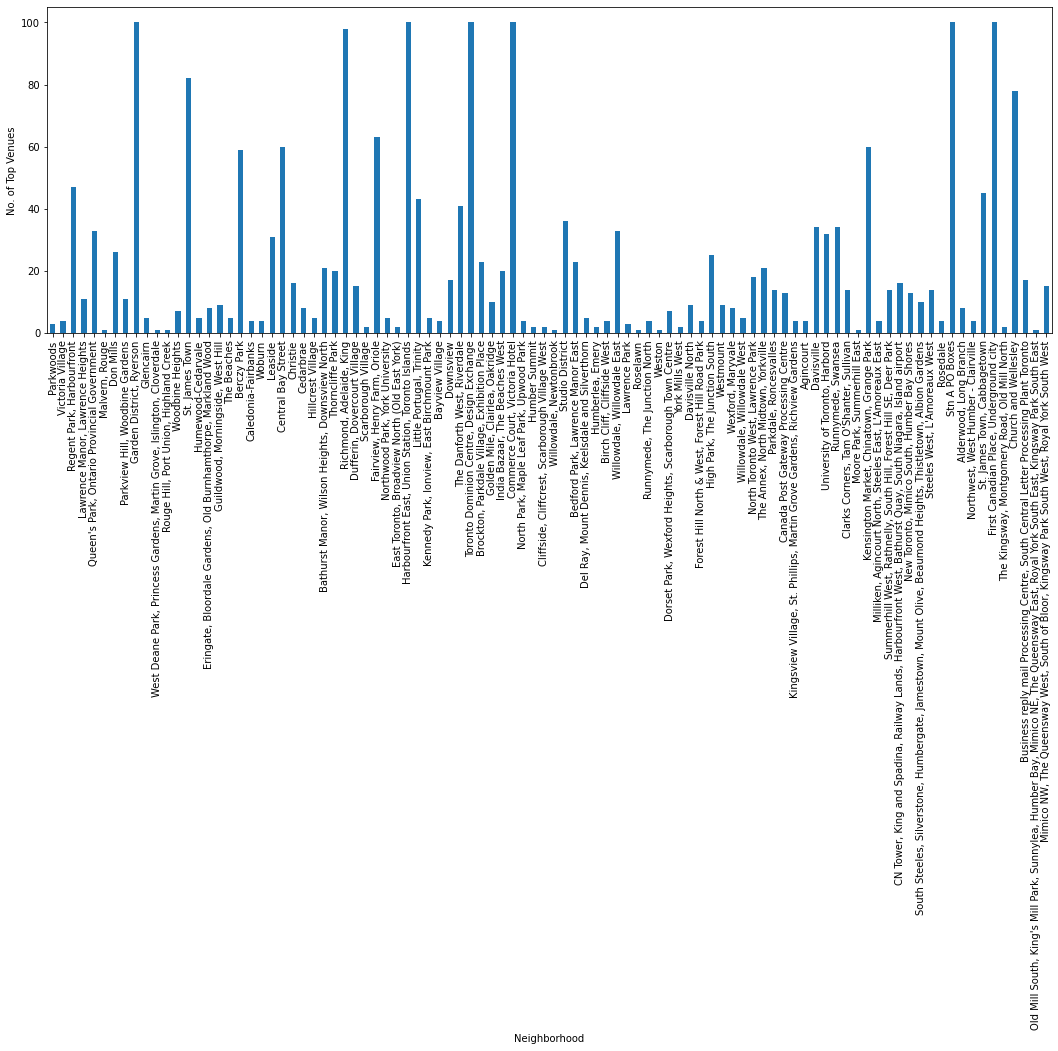

In [72]:
df_plot = df_venues.groupby(['Neighborhood'], sort=False)['Venue'].count()
df_plot.plot.bar(figsize=(18,6))
plt.xlabel('Neighborhood')
plt.ylabel('No. of Top Venues')

In [27]:
print('There are {} uniques categories.'.format(len(df_venues['Venue Category'].unique())))

There are 273 uniques categories.


##### Step#9: Analyze each neighborhood by creating a dataframe with one hot encoding

In [28]:
# one hot encoding
df_onehot = pd.get_dummies(df_venuestest[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
df_onehot['Neighborhood'] = df_venuestest['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [df_onehot.columns[-1]] + list(df_onehot.columns[:-1])
df_onehot = df_onehot[fixed_columns]

df_grouped = df_onehot.groupby('Neighborhood').mean().reset_index()
df_grouped.head()

,Neighborhood,American Restaurant,Asian Restaurant,Belgian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,Colombian Restaurant,Comfort Food Restaurant,...,Restaurant,Seafood Restaurant,Sri Lankan Restaurant,Sushi Restaurant,Taiwanese Restaurant,Thai Restaurant,Theme Restaurant,Tibetan Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,Agincourt,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
1,"Bathurst Manor, Wilson Heights, Downsview North",0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.333333,0.000000,0.0,0.333333,0.0,0.000000,0.0,0.0,0.000000,0.0
2,Bayview Village,0.000000,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
3,"Bedford Park, Lawrence Manor East",0.090909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.090909,...,0.181818,0.000000,0.0,0.090909,0.0,0.090909,0.0,0.0,0.000000,0.0
4,Berczy Park,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.090909,...,0.181818,0.181818,0.0,0.000000,0.0,0.090909,0.0,0.0,0.090909,0.0


In [29]:
df_venuestest.head(10)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
4,Victoria Village,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant
11,"Regent Park, Harbourfront",43.654260,-79.360636,Impact Kitchen,43.656369,-79.356980,Restaurant
32,"Regent Park, Harbourfront",43.654260,-79.360636,El Catrin,43.650601,-79.358920,Mexican Restaurant
38,"Regent Park, Harbourfront",43.654260,-79.360636,Cluny Bistro & Boulangerie,43.650565,-79.357843,French Restaurant
44,"Regent Park, Harbourfront",43.654260,-79.360636,Izumi,43.649970,-79.360153,Asian Restaurant
49,"Regent Park, Harbourfront",43.654260,-79.360636,Flame Shack,43.656844,-79.358917,Restaurant
56,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,Lac Vien Vietnamese Restaurant,43.721259,-79.468472,Vietnamese Restaurant
66,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,Mercatto,43.660391,-79.387664,Italian Restaurant
68,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,Nando's,43.661728,-79.386391,Portuguese Restaurant
72,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,Tokyo Sushi,43.665885,-79.386977,Sushi Restaurant


Text(0, 0.5, 'No.of Restaurents')

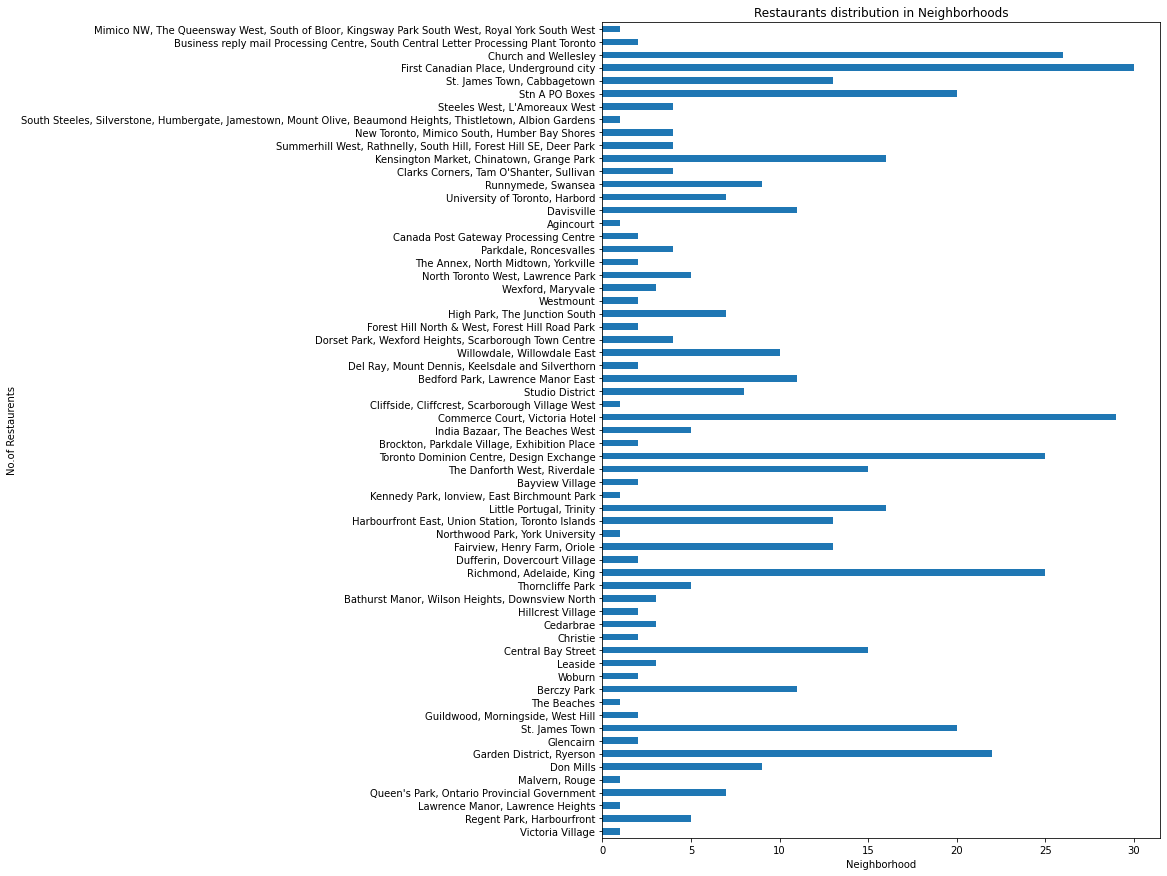

In [30]:
df_res = df_venuestest.groupby(['Neighborhood'], sort=False)['Venue'].count()
df_res.plot.barh(figsize=(10,15))
plt.title('Restaurants distribution in Neighborhoods')
plt.xlabel('Neighborhood')
plt.ylabel('No.of Restaurents')

In [31]:
df_grouped.shape

(63, 49)

In [32]:
df_onehot.shape

(482, 49)

In [33]:
df_grouped

,Neighborhood,American Restaurant,Asian Restaurant,Belgian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,Colombian Restaurant,Comfort Food Restaurant,...,Restaurant,Seafood Restaurant,Sri Lankan Restaurant,Sushi Restaurant,Taiwanese Restaurant,Thai Restaurant,Theme Restaurant,Tibetan Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,Agincourt,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
1,"Bathurst Manor, Wilson Heights, Downsview North",0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.333333,0.000000,0.0,0.333333,0.0,0.000000,0.0,0.0,0.000000,0.000000
2,Bayview Village,0.000000,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
3,"Bedford Park, Lawrence Manor East",0.090909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.090909,...,0.181818,0.000000,0.0,0.090909,0.0,0.090909,0.0,0.0,0.000000,0.000000
4,Berczy Park,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.090909,...,0.181818,0.181818,0.0,0.000000,0.0,0.090909,0.0,0.0,0.090909,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,Victoria Village,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
59,Westmount,0.000000,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
60,"Wexford, Maryvale",0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.333333
61,"Willowdale, Willowdale East",0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.100000,0.000000,0.0,0.100000,0.0,0.000000,0.0,0.0,0.000000,0.100000


In [34]:
num_top_venues = 10

for hood in df_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = df_grouped[df_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agincourt----
                             venue  freq
0        Latin American Restaurant   1.0
1              American Restaurant   0.0
2                 Asian Restaurant   0.0
3            Korean BBQ Restaurant   0.0
4                Korean Restaurant   0.0
5         Mediterranean Restaurant   0.0
6               Mexican Restaurant   0.0
7        Middle Eastern Restaurant   0.0
8       Modern European Restaurant   0.0
9  Molecular Gastronomy Restaurant   0.0


----Bathurst Manor, Wilson Heights, Downsview North----
                       venue  freq
0           Sushi Restaurant  0.33
1  Middle Eastern Restaurant  0.33
2                 Restaurant  0.33
3        American Restaurant  0.00
4    New American Restaurant  0.00
5      Korean BBQ Restaurant  0.00
6          Korean Restaurant  0.00
7  Latin American Restaurant  0.00
8   Mediterranean Restaurant  0.00
9         Mexican Restaurant  0.00


----Bayview Village----
                        venue  freq
0          Chinese Restaur

##### Step10: Sort top restaurants into groups per Neighborhood

In [35]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [36]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = df_grouped['Neighborhood']

for ind in np.arange(df_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(df_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Latin American Restaurant,Vietnamese Restaurant,Hakka Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant
1,"Bathurst Manor, Wilson Heights, Downsview North",Sushi Restaurant,Restaurant,Middle Eastern Restaurant,Vietnamese Restaurant,Doner Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant
2,Bayview Village,Japanese Restaurant,Chinese Restaurant,Vietnamese Restaurant,Dumpling Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant
3,"Bedford Park, Lawrence Manor East",Restaurant,Italian Restaurant,Indian Restaurant,Comfort Food Restaurant,Fast Food Restaurant,Greek Restaurant,American Restaurant,Sushi Restaurant,Thai Restaurant,Sri Lankan Restaurant
4,Berczy Park,Seafood Restaurant,Restaurant,Greek Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,French Restaurant,Japanese Restaurant,Comfort Food Restaurant,Eastern European Restaurant,Dumpling Restaurant


##### Step#11# Cluster Analysis on Neighborhood vs. Restaurant distribution using KMeans Clustering method

In [37]:
# set number of clusters
kclusters = 5

df_grouped_clustering = df_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 2, 4, 2, 2, 2, 2, 1, 1, 2], dtype=int32)

In [38]:
# Create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

df_merged = df

# merge ct_grouped with ct_data to add latitude/longitude for each neighborhood
df_merged = df_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

df_merged.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M3A,North York,Parkwoods,43.753259,-79.329656,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,M4A,North York,Victoria Village,43.725882,-79.315572,1.0,Portuguese Restaurant,Vietnamese Restaurant,Doner Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,2.0,Restaurant,Asian Restaurant,French Restaurant,Mexican Restaurant,Vietnamese Restaurant,Dumpling Restaurant,Gluten-free Restaurant,German Restaurant,Filipino Restaurant,Fast Food Restaurant
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,1.0,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Greek Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,2.0,Sushi Restaurant,Vegetarian / Vegan Restaurant,Italian Restaurant,Japanese Restaurant,Portuguese Restaurant,Mexican Restaurant,Vietnamese Restaurant,Dumpling Restaurant,French Restaurant,Filipino Restaurant


In [40]:
#Ignore/drop NaNs
df_merged.dropna(axis=0, how='any',inplace=True)
df_merged.reset_index(inplace=True, drop=True)
print("Number of rows after dropping NaNs:", len(df_merged))
print("Number of NaNs:", df_merged.isna().sum())

Number of rows after dropping NaNs: 64
Number of NaNs: Postal Code               0
Borough                   0
Neighborhood              0
Latitude                  0
Longitude                 0
Cluster Labels            0
1st Most Common Venue     0
2nd Most Common Venue     0
3rd Most Common Venue     0
4th Most Common Venue     0
5th Most Common Venue     0
6th Most Common Venue     0
7th Most Common Venue     0
8th Most Common Venue     0
9th Most Common Venue     0
10th Most Common Venue    0
dtype: int64


In [41]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_merged['Latitude'], df_merged['Longitude'], df_merged['Neighborhood'], df_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

##### Step#12: Examine the first 5 Clusters

In [42]:
df_merged.groupby('Cluster Labels').count()

,Postal Code,Borough,Neighborhood,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
Cluster Labels,,,,,,,,,,,,,,,
0.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1.0,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15
2.0,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40
3.0,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
4.0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3


In [43]:
#Cluster 1
df_merged.loc[df_merged['Cluster Labels'] == 0, df_merged.columns[[2] + list(range(6, df_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
48,Agincourt,Latin American Restaurant,Vietnamese Restaurant,Hakka Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant


French Restaurant            1
Ethiopian Restaurant         1
Vietnamese Restaurant        1
Falafel Restaurant           1
Latin American Restaurant    1
Hakka Restaurant             1
German Restaurant            1
Gluten-free Restaurant       1
Fast Food Restaurant         1
Filipino Restaurant          1
dtype: int64


Text(0, 0.5, 'Number')

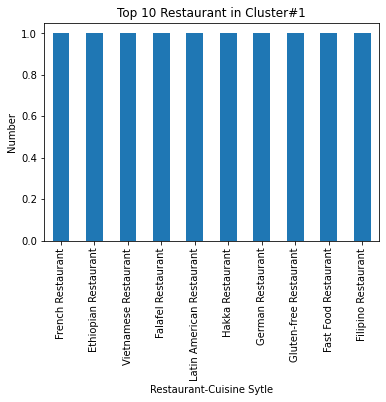

In [63]:
cluster1 = df_merged.loc[df_merged['Cluster Labels'] == 0, df_merged.columns[[0] + 
                                                                                    list(range(4, df_merged.shape[1]))]]
venues1 = (cluster1['1st Most Common Venue'].append(
    cluster1['2nd Most Common Venue']).append(
    cluster1['3rd Most Common Venue']).append(
    cluster1['4th Most Common Venue']).append(
    cluster1['5th Most Common Venue']).append(
    cluster1['6th Most Common Venue']).append(
    cluster1['7th Most Common Venue']).append(
    cluster1['8th Most Common Venue']).append(
    cluster1['9th Most Common Venue']).append(
    cluster1['10th Most Common Venue']))

print(venues1.value_counts().head(10))

# common venues in cluster1
venues1.value_counts().T.plot.bar()
plt.title("Top 10 Restaurant in Cluster#1")
plt.xlabel('Restaurant-Cuisine Sytle') 
plt.ylabel('Number')

In [49]:
#Cluster 2
df_merged.loc[df_merged['Cluster Labels'] == 1, df_merged.columns[[2] + list(range(6, df_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Victoria Village,Portuguese Restaurant,Vietnamese Restaurant,Doner Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant
2,"Lawrence Manor, Lawrence Heights",Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Greek Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant
11,The Beaches,Asian Restaurant,Vietnamese Restaurant,Dumpling Restaurant,Greek Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant
13,Woburn,Indian Restaurant,Korean BBQ Restaurant,Hakka Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant
17,Cedarbrae,Thai Restaurant,Caribbean Restaurant,Hakka Restaurant,Vietnamese Restaurant,Dumpling Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant
20,Thorncliffe Park,Indian Restaurant,Fast Food Restaurant,Restaurant,Middle Eastern Restaurant,Doner Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Falafel Restaurant
22,"Dufferin, Dovercourt Village",Middle Eastern Restaurant,Portuguese Restaurant,Vietnamese Restaurant,Doner Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant
24,"Northwood Park, York University",Caribbean Restaurant,Vietnamese Restaurant,Dumpling Restaurant,Greek Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant
34,"Cliffside, Cliffcrest, Scarborough Village West",American Restaurant,Vegetarian / Vegan Restaurant,Greek Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant
35,Studio District,American Restaurant,Italian Restaurant,Thai Restaurant,Seafood Restaurant,Latin American Restaurant,Comfort Food Restaurant,Middle Eastern Restaurant,Dumpling Restaurant,French Restaurant,Filipino Restaurant


Filipino Restaurant       15
French Restaurant         14
Fast Food Restaurant      13
German Restaurant         13
Gluten-free Restaurant    12
Falafel Restaurant        12
Vietnamese Restaurant      9
Ethiopian Restaurant       7
Hakka Restaurant           5
Dumpling Restaurant        5
dtype: int64


Text(0, 0.5, 'Number')

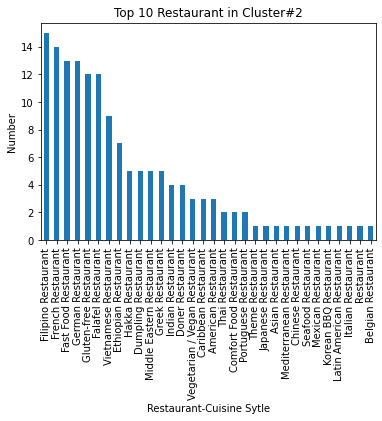

In [62]:
cluster2 = df_merged.loc[df_merged['Cluster Labels'] == 1, df_merged.columns[[0] + 
                                                                                    list(range(4, df_merged.shape[1]))]]
venues2 = (cluster2['1st Most Common Venue'].append(
    cluster2['2nd Most Common Venue']).append(
    cluster2['3rd Most Common Venue']).append(
    cluster2['4th Most Common Venue']).append(
    cluster2['5th Most Common Venue']).append(
    cluster2['6th Most Common Venue']).append(
    cluster2['7th Most Common Venue']).append(
    cluster2['8th Most Common Venue']).append(
    cluster2['9th Most Common Venue']).append(
    cluster2['10th Most Common Venue']))

print(venues2.value_counts().head(10))

# common venues in cluster2
venues2.value_counts().T.plot.bar()
plt.title("Top 10 Restaurant in Cluster#2")
plt.xlabel('Restaurant-Cuisine Sytle') 
plt.ylabel('Number')

In [57]:
#Cluster 3
df_merged.loc[df_merged['Cluster Labels'] == 2, df_merged.columns[[2] + list(range(6, df_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,"Regent Park, Harbourfront",Restaurant,Asian Restaurant,French Restaurant,Mexican Restaurant,Vietnamese Restaurant,Dumpling Restaurant,Gluten-free Restaurant,German Restaurant,Filipino Restaurant,Fast Food Restaurant
3,"Queen's Park, Ontario Provincial Government",Sushi Restaurant,Vegetarian / Vegan Restaurant,Italian Restaurant,Japanese Restaurant,Portuguese Restaurant,Mexican Restaurant,Vietnamese Restaurant,Dumpling Restaurant,French Restaurant,Filipino Restaurant
5,Don Mills,Restaurant,Dim Sum Restaurant,Asian Restaurant,Italian Restaurant,Japanese Restaurant,Sushi Restaurant,Caribbean Restaurant,Chinese Restaurant,Eastern European Restaurant,German Restaurant
6,"Garden District, Ryerson",Middle Eastern Restaurant,Japanese Restaurant,Italian Restaurant,Ramen Restaurant,Fast Food Restaurant,Vietnamese Restaurant,Mexican Restaurant,Modern European Restaurant,New American Restaurant,Chinese Restaurant
7,Glencairn,Japanese Restaurant,Sushi Restaurant,Vietnamese Restaurant,Doner Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant
8,Don Mills,Restaurant,Dim Sum Restaurant,Asian Restaurant,Italian Restaurant,Japanese Restaurant,Sushi Restaurant,Caribbean Restaurant,Chinese Restaurant,Eastern European Restaurant,German Restaurant
9,St. James Town,American Restaurant,Italian Restaurant,Moroccan Restaurant,Seafood Restaurant,Restaurant,New American Restaurant,Vegetarian / Vegan Restaurant,Japanese Restaurant,Middle Eastern Restaurant,French Restaurant
10,"Guildwood, Morningside, West Hill",Mexican Restaurant,Restaurant,Vietnamese Restaurant,Doner Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant
12,Berczy Park,Seafood Restaurant,Restaurant,Greek Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,French Restaurant,Japanese Restaurant,Comfort Food Restaurant,Eastern European Restaurant,Dumpling Restaurant
14,Leaside,Sushi Restaurant,Restaurant,Mexican Restaurant,Vietnamese Restaurant,Doner Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant


Restaurant               33
French Restaurant        27
Italian Restaurant       25
Fast Food Restaurant     23
Vietnamese Restaurant    22
Sushi Restaurant         21
Japanese Restaurant      20
German Restaurant        20
Filipino Restaurant      20
Doner Restaurant         14
dtype: int64


Text(0, 0.5, 'Number')

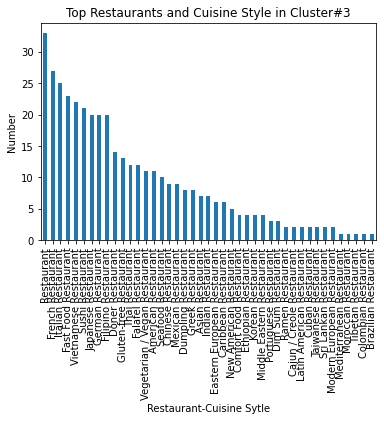

In [59]:
cluster3 = df_merged.loc[df_merged['Cluster Labels'] == 2, df_merged.columns[[0] + 
                                                                                    list(range(4, df_merged.shape[1]))]]
venues3 = (cluster3['1st Most Common Venue'].append(
    cluster3['2nd Most Common Venue']).append(
    cluster3['3rd Most Common Venue']).append(
    cluster3['4th Most Common Venue']).append(
    cluster3['5th Most Common Venue']).append(
    cluster3['6th Most Common Venue']).append(
    cluster3['7th Most Common Venue']).append(
    cluster3['8th Most Common Venue']).append(
    cluster3['9th Most Common Venue']).append(
    cluster3['10th Most Common Venue']))

print(venues3.value_counts().head(10))


# common venues in cluster3
venues3.value_counts().T.plot.bar()
plt.title("Top Restaurants and Cuisine Style in Cluster#3")
plt.xlabel('Restaurant-Cuisine Sytle') 
plt.ylabel('Number')

In [64]:
#Cluster 4
df_merged.loc[df_merged['Cluster Labels'] == 3, df_merged.columns[[2] + list(range(6, df_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,"Malvern, Rouge",Fast Food Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Greek Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Falafel Restaurant,Ethiopian Restaurant
18,Hillcrest Village,Mediterranean Restaurant,Fast Food Restaurant,Vietnamese Restaurant,Hakka Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Falafel Restaurant,Ethiopian Restaurant
56,"South Steeles, Silverstone, Humbergate, Jamest...",Fast Food Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Greek Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Falafel Restaurant,Ethiopian Restaurant
57,"Steeles West, L'Amoreaux West",Fast Food Restaurant,Chinese Restaurant,Vietnamese Restaurant,Dumpling Restaurant,Greek Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Falafel Restaurant
63,"Mimico NW, The Queensway West, South of Bloor,...",Fast Food Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Greek Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Falafel Restaurant,Ethiopian Restaurant


Fast Food Restaurant             5
Vietnamese Restaurant            5
Filipino Restaurant              5
French Restaurant                5
Falafel Restaurant               5
German Restaurant                5
Gluten-free Restaurant           5
Ethiopian Restaurant             4
Greek Restaurant                 4
Vegetarian / Vegan Restaurant    3
dtype: int64


Text(0, 0.5, 'Number')

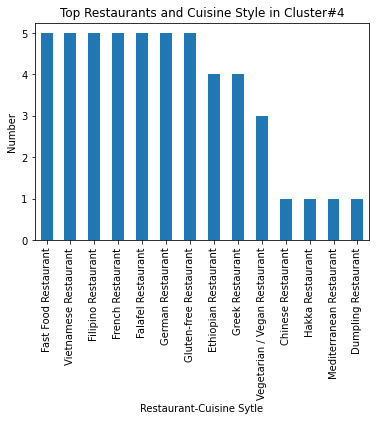

In [66]:
cluster4 = df_merged.loc[df_merged['Cluster Labels'] == 3, df_merged.columns[[0] + 
                                                                                    list(range(4, df_merged.shape[1]))]]
venues4 = (cluster4['1st Most Common Venue'].append(
    cluster4['2nd Most Common Venue']).append(
    cluster4['3rd Most Common Venue']).append(
    cluster4['4th Most Common Venue']).append(
    cluster4['5th Most Common Venue']).append(
    cluster4['6th Most Common Venue']).append(
    cluster4['7th Most Common Venue']).append(
    cluster4['8th Most Common Venue']).append(
    cluster4['9th Most Common Venue']).append(
    cluster4['10th Most Common Venue']))

print(venues4.value_counts().head(10))


# common venues in cluster4
venues4.value_counts().T.plot.bar()
plt.title("Top Restaurants and Cuisine Style in Cluster#4")
plt.xlabel('Restaurant-Cuisine Sytle') 
plt.ylabel('Number')

In [67]:
#Cluster 5
df_merged.loc[df_merged['Cluster Labels'] == 4, df_merged.columns[[2] + list(range(6, df_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
27,"Kennedy Park, Ionview, East Birchmount Park",Chinese Restaurant,Vietnamese Restaurant,Dumpling Restaurant,Greek Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant
28,Bayview Village,Japanese Restaurant,Chinese Restaurant,Vietnamese Restaurant,Dumpling Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant
42,Westmount,Chinese Restaurant,Middle Eastern Restaurant,Vietnamese Restaurant,Dumpling Restaurant,Gluten-free Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant


French Restaurant         3
Vietnamese Restaurant     3
Falafel Restaurant        3
Chinese Restaurant        3
Filipino Restaurant       3
German Restaurant         3
Gluten-free Restaurant    3
Fast Food Restaurant      3
Dumpling Restaurant       3
Japanese Restaurant       1
dtype: int64


Text(0, 0.5, 'Number')

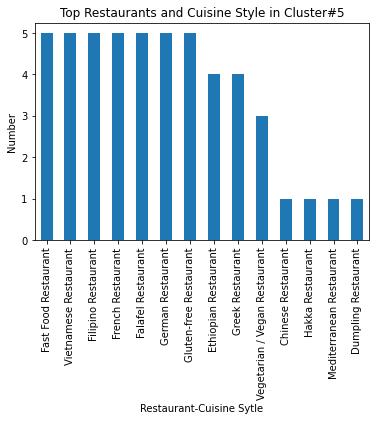

In [75]:
cluster5 = df_merged.loc[df_merged['Cluster Labels'] == 4, df_merged.columns[[0] + 
                                                                                    list(range(4, df_merged.shape[1]))]]
venues5 = (cluster5['1st Most Common Venue'].append(
    cluster5['2nd Most Common Venue']).append(
    cluster5['3rd Most Common Venue']).append(
    cluster5['4th Most Common Venue']).append(
    cluster5['5th Most Common Venue']).append(
    cluster5['6th Most Common Venue']).append(
    cluster5['7th Most Common Venue']).append(
    cluster5['8th Most Common Venue']).append(
    cluster5['9th Most Common Venue']).append(
    cluster5['10th Most Common Venue']))

print(venues5.value_counts().head(10))


# common venues in cluster5
venues4.value_counts().T.plot.bar()
plt.title("Top Restaurants and Cuisine Style in Cluster#5")
plt.xlabel('Restaurant-Cuisine Sytle') 
plt.ylabel('Number')

##### The Analysis is complete within the scope of problem defintion.   This analysis shows Cluster-2 and Cluster-3 have high number of restaurant with different cuisine styles. Further analysis and interpretation will be put together into a slide deck for Week#5 portion.

## THANK YOU